# Estimation des prix des vehicules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import classification_report

%matplotlib inline

df = pd.read_csv("data.csv")

df.head(15)

,marque,modele,kilometrage,annee,energie,boite,puissance,prix
0,0,0,213,2008,0,0,9,10000
1,1,1,180,2009,1,0,6,10000
2,2,2,44000,2017,0,1,5,102000
3,3,3,78000,2012,0,1,11,107500
4,1,4,200000,1996,0,0,4,11000
5,4,5,197,2000,0,0,4,11000
6,1,6,360000,2004,1,0,7,11000
7,5,7,120000,2010,0,1,21,110000
8,6,8,145000,2012,1,1,9,115000
9,7,9,218,2002,0,0,5,11700


## informations sur les champs

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 8 columns):
marque         175 non-null int64
modele         175 non-null int64
kilometrage    175 non-null int64
annee          175 non-null int64
energie        175 non-null int64
boite          175 non-null int64
puissance      175 non-null int64
prix           175 non-null int64
dtypes: int64(8)
memory usage: 11.0 KB


## nombres des champs vides pour chaque colonne

In [4]:
df.isnull().sum()

marque         0
modele         0
kilometrage    0
annee          0
energie        0
boite          0
puissance      0
prix           0
dtype: int64

## les premiers lignes

In [5]:
df.head()

,marque,modele,kilometrage,annee,energie,boite,puissance,prix
0,0,0,213,2008,0,0,9,10000
1,1,1,180,2009,1,0,6,10000
2,2,2,44000,2017,0,1,5,102000
3,3,3,78000,2012,0,1,11,107500
4,1,4,200000,1996,0,0,4,11000


# Visualisation des donnees

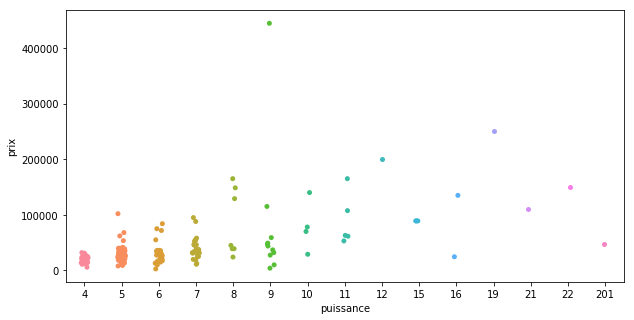

In [6]:
plt.figure(figsize=(10, 5))
sb.stripplot(x="puissance", y="prix", data=df);

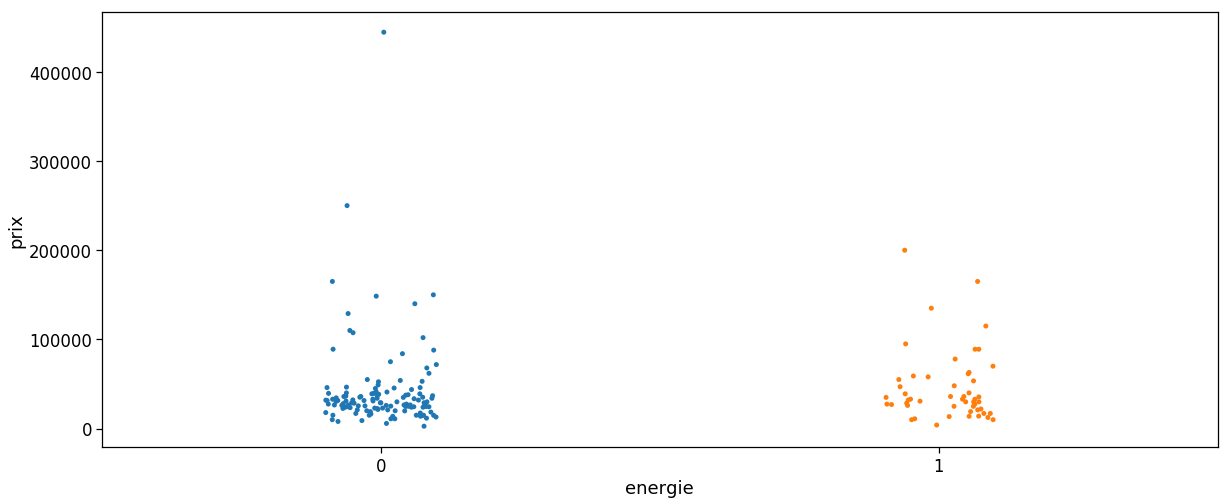

In [7]:
plt.figure(figsize=(20, 8))
sb.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sb.stripplot(x="energie", y="prix", data=df);

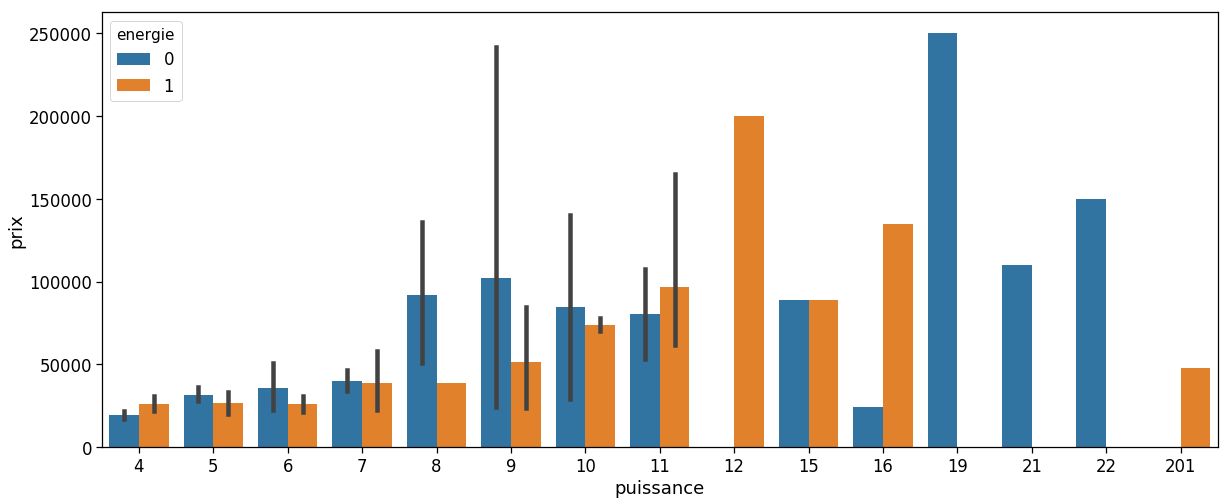

In [8]:
plt.figure(figsize=(20, 8))
sb.barplot(x="puissance", y="prix", hue="energie", data=df);

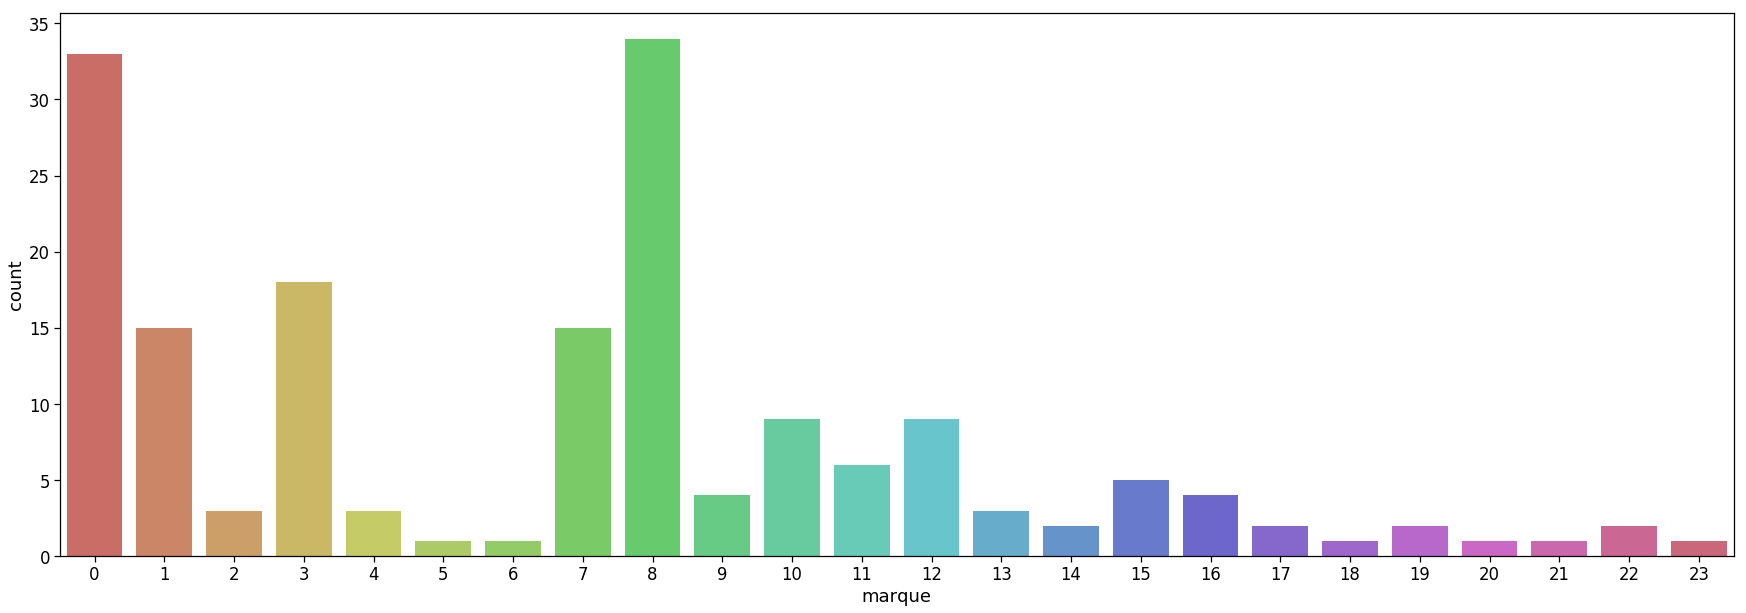

In [9]:
plt.figure(figsize=(30, 10))
sb.countplot(x='marque',data=df, palette='hls')

# Training, Testing

In [13]:

columns = ['marque', 'modele', 'kilometrage', 'annee', 'energie', 'boite', 'puissance']
labels = df['prix'].values
features = df[list(columns)].values

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

print("terminee")

terminee


In [14]:

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

Accuracy = regr.score(X_train, y_train)
print ("training: " + str(Accuracy*100) + "%")

accuracy2 = regr.score(X_test, y_test)
print ("testing: " + str(accuracy2 * 100) + "%")

training: 20.864547479596503%
testing: 39.880701282556316%


# Testing accurancy

In [15]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

Accuracy = regr.score(X_train, y_train)
print (' train result ' + str(Accuracy*100) + '%')

accuracy2 = regr.score(X_test, y_test)
print (' test result ' + str(accuracy2*100) + '%')

 train result 20.864547479596503%
 test result 39.880701282556316%


# Estimation des prix

## les donnees

In [16]:
vehicule_data = [[0,0,213,2008,0,0,9], 
               [1,1,180,2009,1,0,6], 
               [2,2,44000,2017,0,1,5]]  

## les prix estimee

In [1]:
for i, prix in enumerate(regr.predict(vehicule_data)):
    print("estimation pour vehicule numero {} : {:,.2f}".format(i+1, prix) + " DT")

NameError: name 'regr' is not defined

## Exportation du modele

In [15]:
from sklearn.externals import joblib

In [17]:
joblib.dump(regr, 'my_model.pkl', compress=9)

['my_model.pkl']

## Importation du modele


In [18]:
#from sklearn.externals import joblib
#model_clone = joblib.load('my_model.pkl')